## `Import Statements`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pycaret 

## Load the Data

In [2]:
df = pd.read_csv('./boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


## Preliminary Data Exploration

In [3]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [4]:
def PreliminaryDataExploration(data):
    print(f'1. The shape of the dataset:\n{data.shape}\n')
    print(f'2. Columns name:\n{data.columns.values}\n')
    print(f'3. Are there null values?\n{data.isna().values.any()}\n')
    print(f'4. Are there any duplicates?\n{data.duplicated().values.any()}\n')
    print(f'5. Types of the columns?\n{data.dtypes}')
    

PreliminaryDataExploration(df)

1. The shape of the dataset:
(506, 14)

2. Columns name:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'PRICE']

3. Are there null values?
False

4. Are there any duplicates?
False

5. Types of the columns?
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


In [5]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Descriptive Statistics

* What is the average price of a home in the dataset?

In [6]:
df.PRICE.mean()*1000

22532.806324110676

* How many students are there per teacher on average?

In [7]:
df.PTRATIO.sum()

9338.5

* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [8]:
df.RM.max()

8.78

In [9]:
df.RM.min()

3.561

## Visualise the Features

Having looked at some descriptive statistics, visualise the data for the model. Use [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables: 
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 

Setting the `aspect` parameter to `2` for a better picture. 

#### `House Prices` 💰

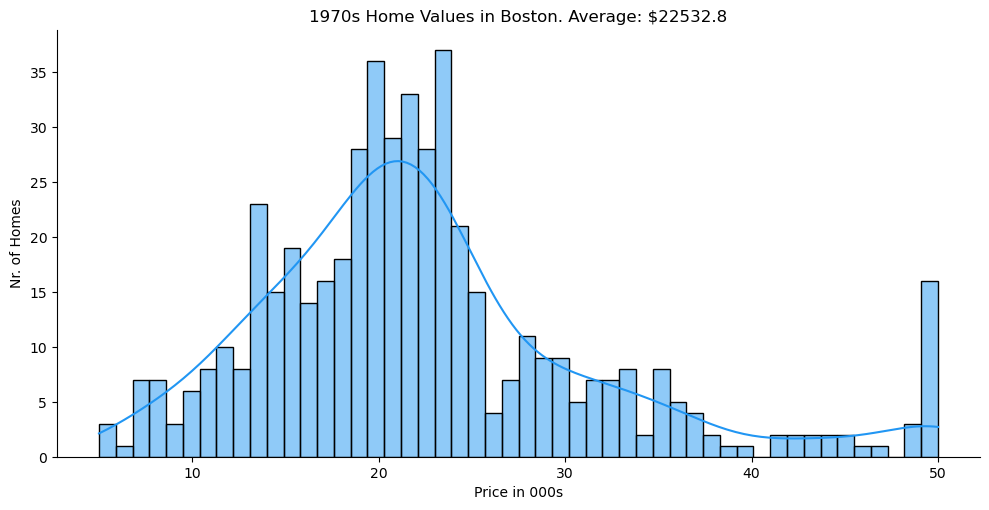

In [10]:
sns.displot(df['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*df.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

Note there is a spike in the number homes at the very right tail at the $50,000 mark. 🤔

#### Distance to Employment - Length of Commute 🚗

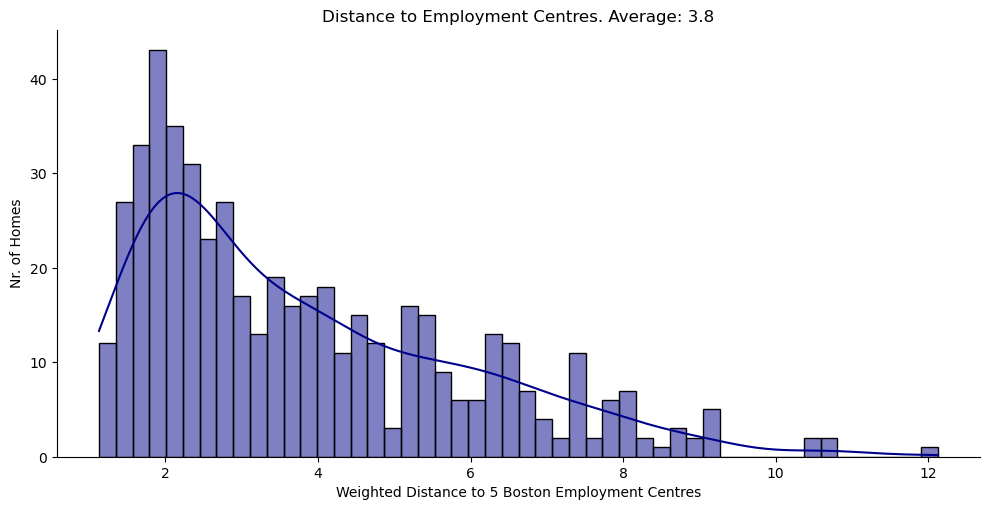

In [11]:
sns.displot(df.DIS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(df.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

#### Number of Rooms

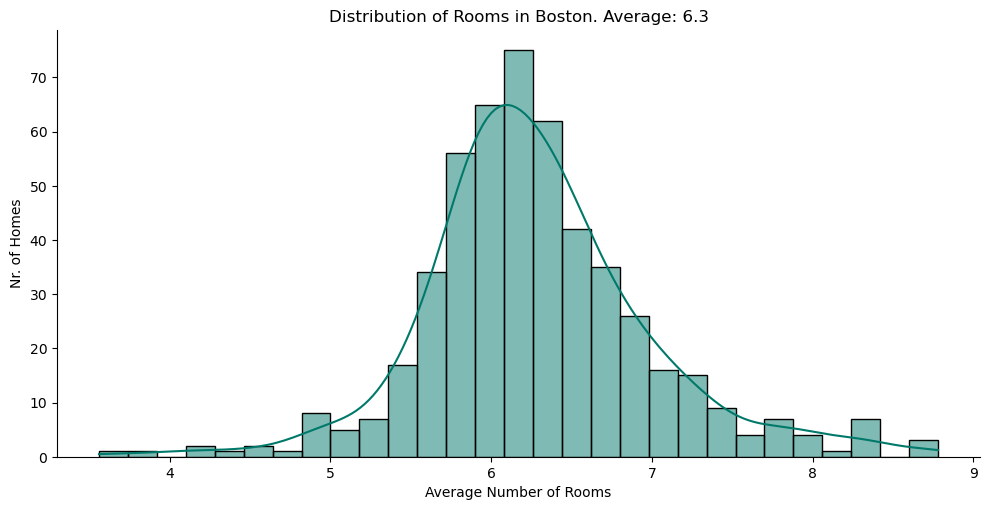

In [12]:
sns.displot(df.RM, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {df.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### Access to Highways 🛣

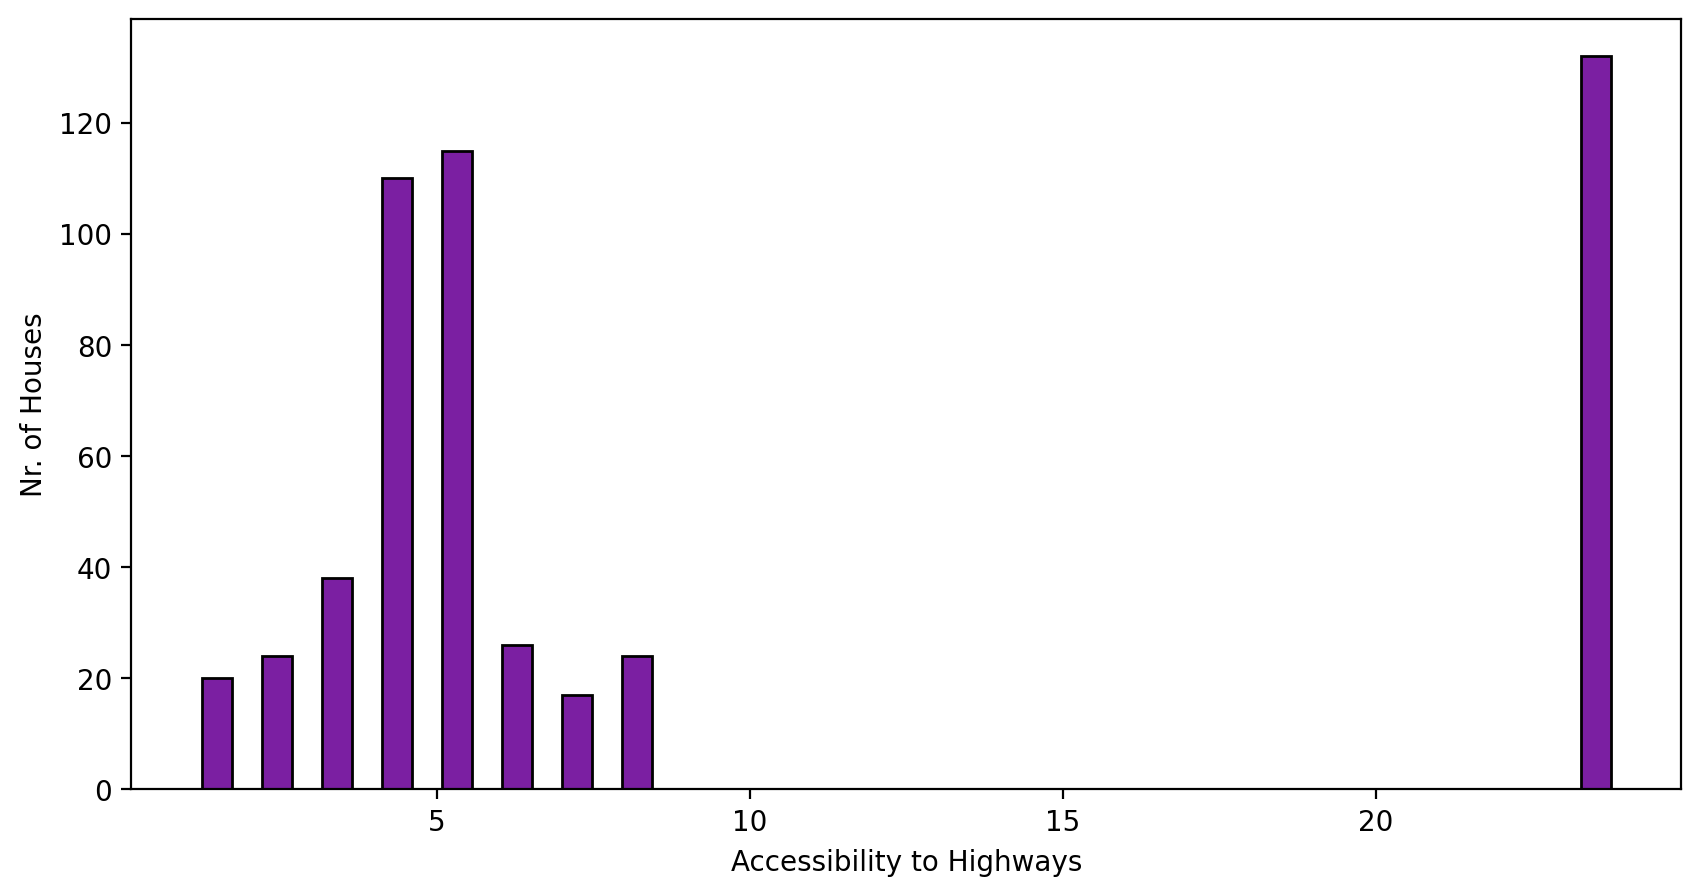

In [13]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(df['RAD'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

#### Next to the River? ⛵️

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it.

In [14]:
river_access = df['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

Note that out of the total number of 506 homes, only 35 are located next to the Charles River. 

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

In [15]:
scatter = px.scatter(df, x='PRICE', y='CHAS', color='CHAS', color_continuous_scale='Bluered_r')

scatter.show()

# Understand the Relationships in the Data

### Run a Pair Plot

There might be some relationships in the data that we should know about. Before running the code, make some predictions:

* What to expect the relationship to be between pollution (NOX) and the distance to employment (DIS)? 
* What kind of relationship to expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices? 

Run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check the intuition regarding the questions above on the `pairplot`. 

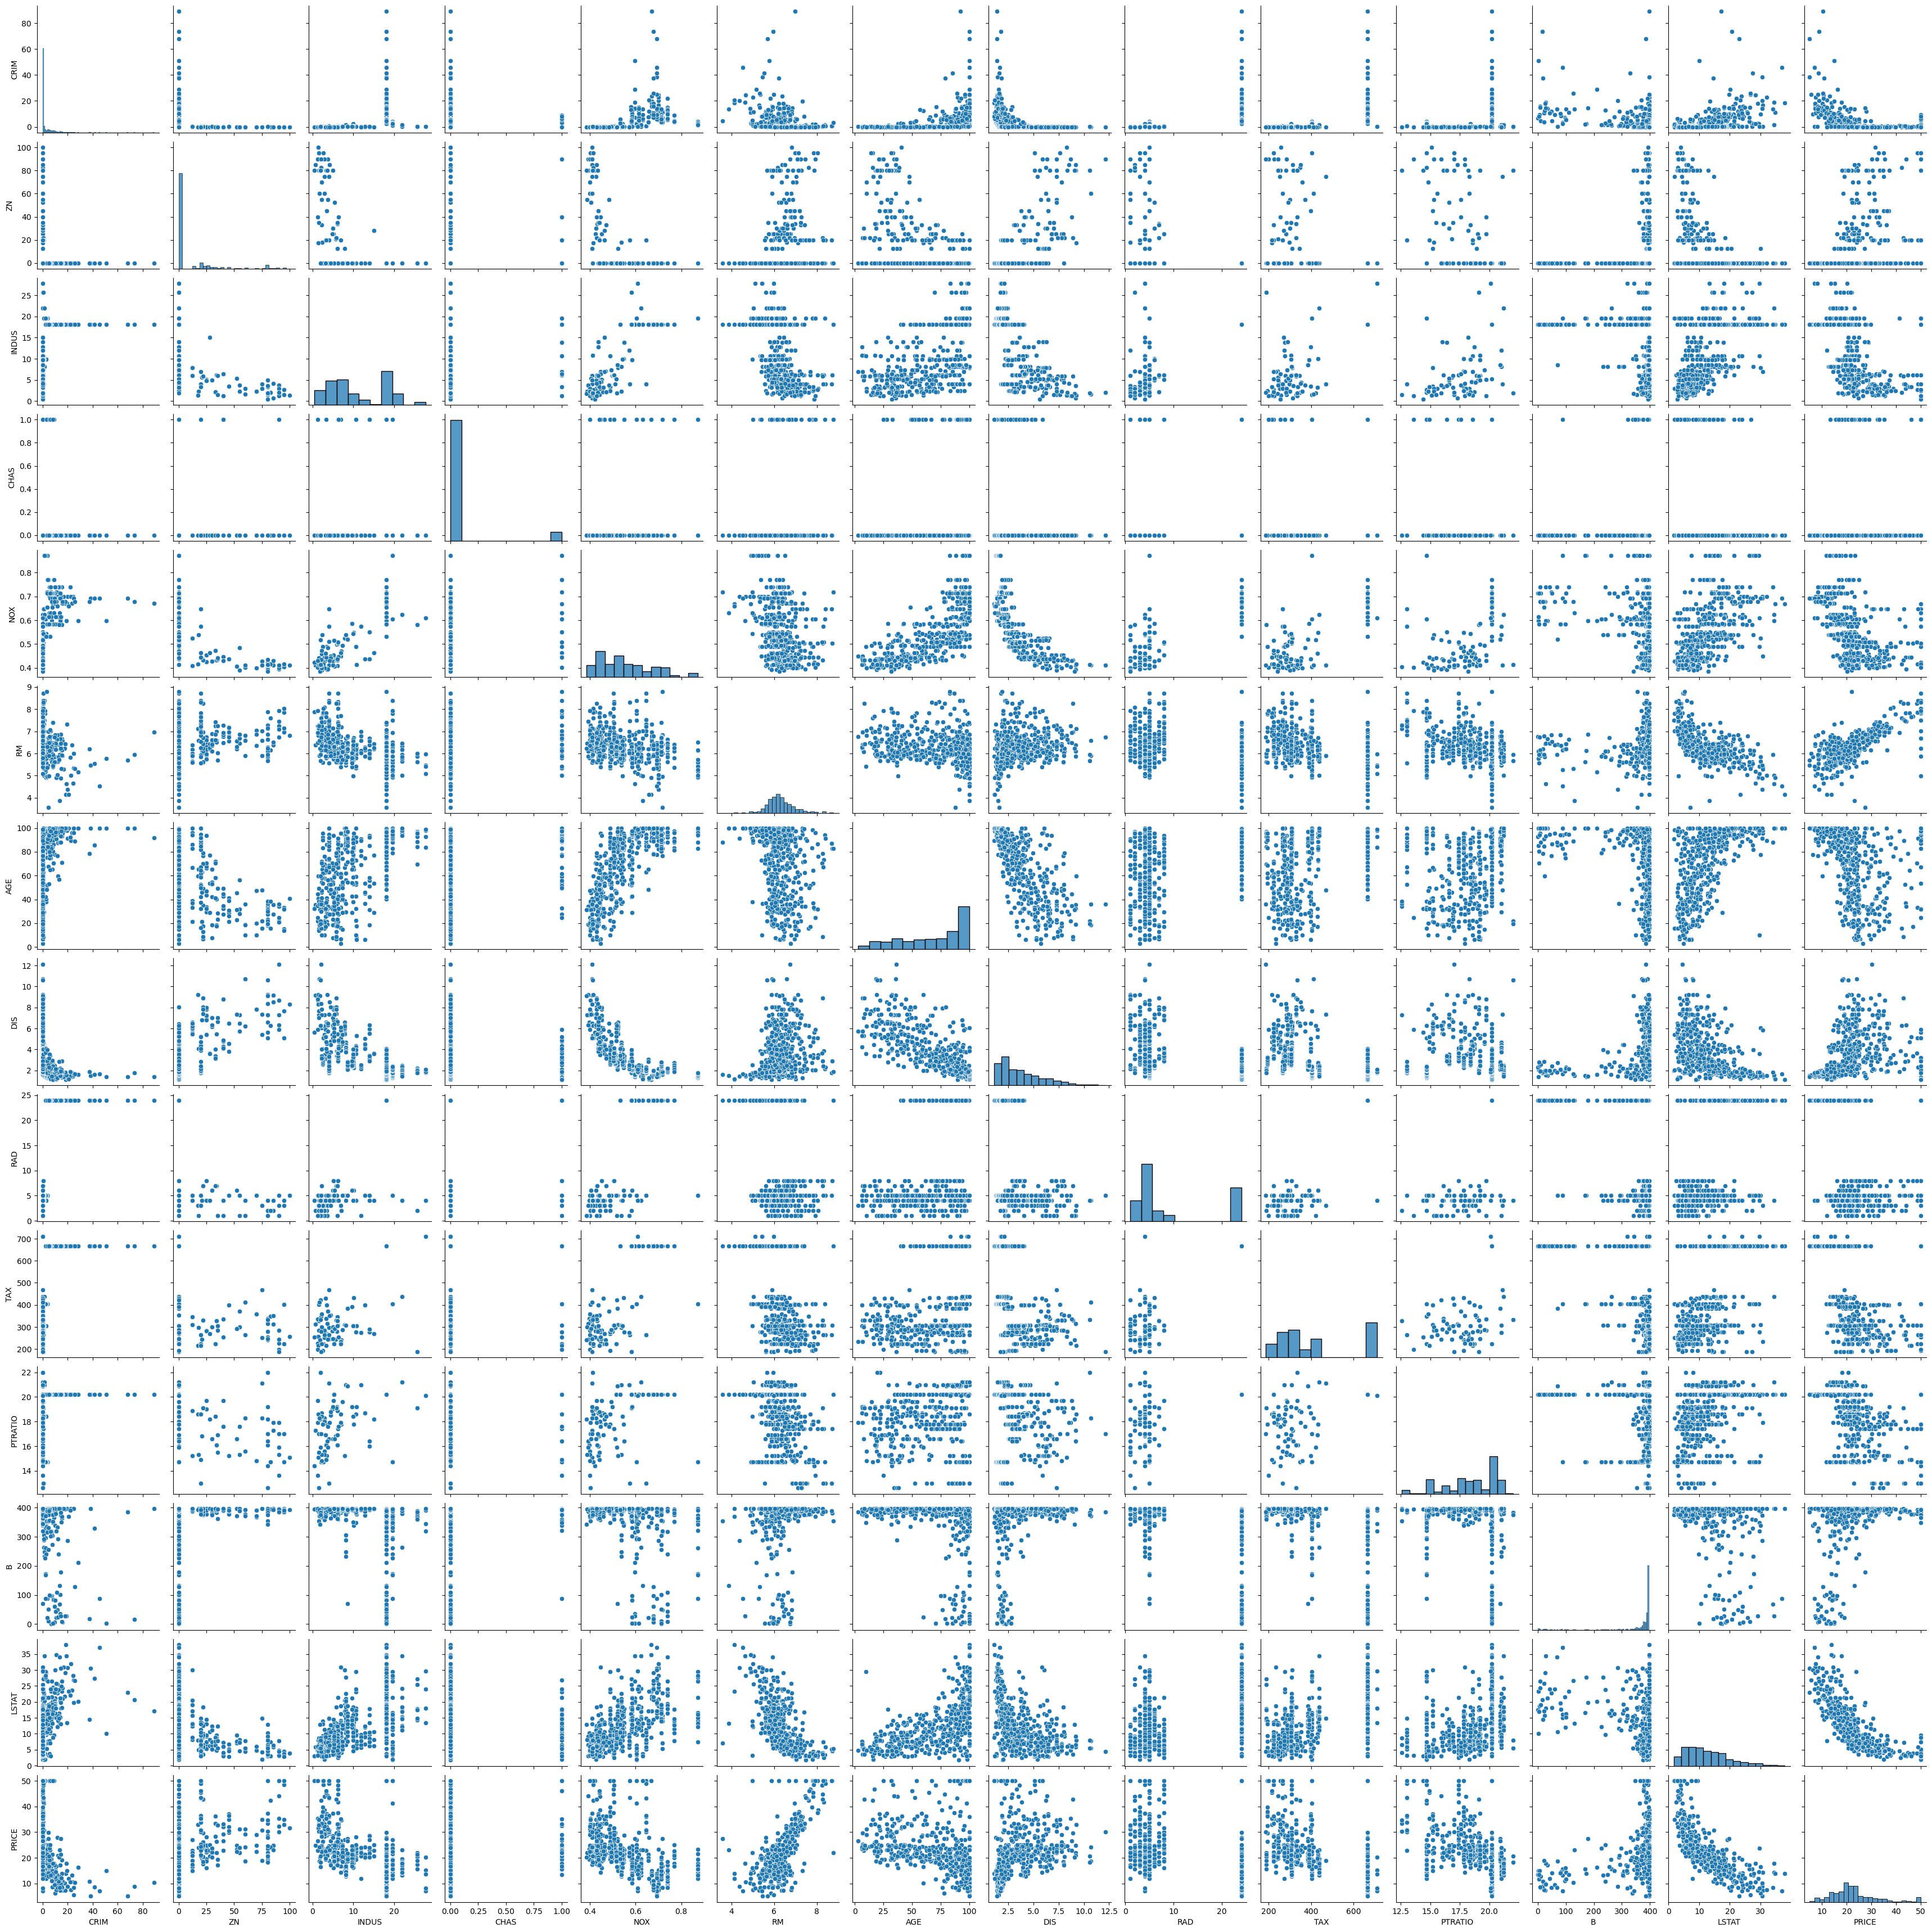

In [16]:
sns.pairplot(df)
plt.show()

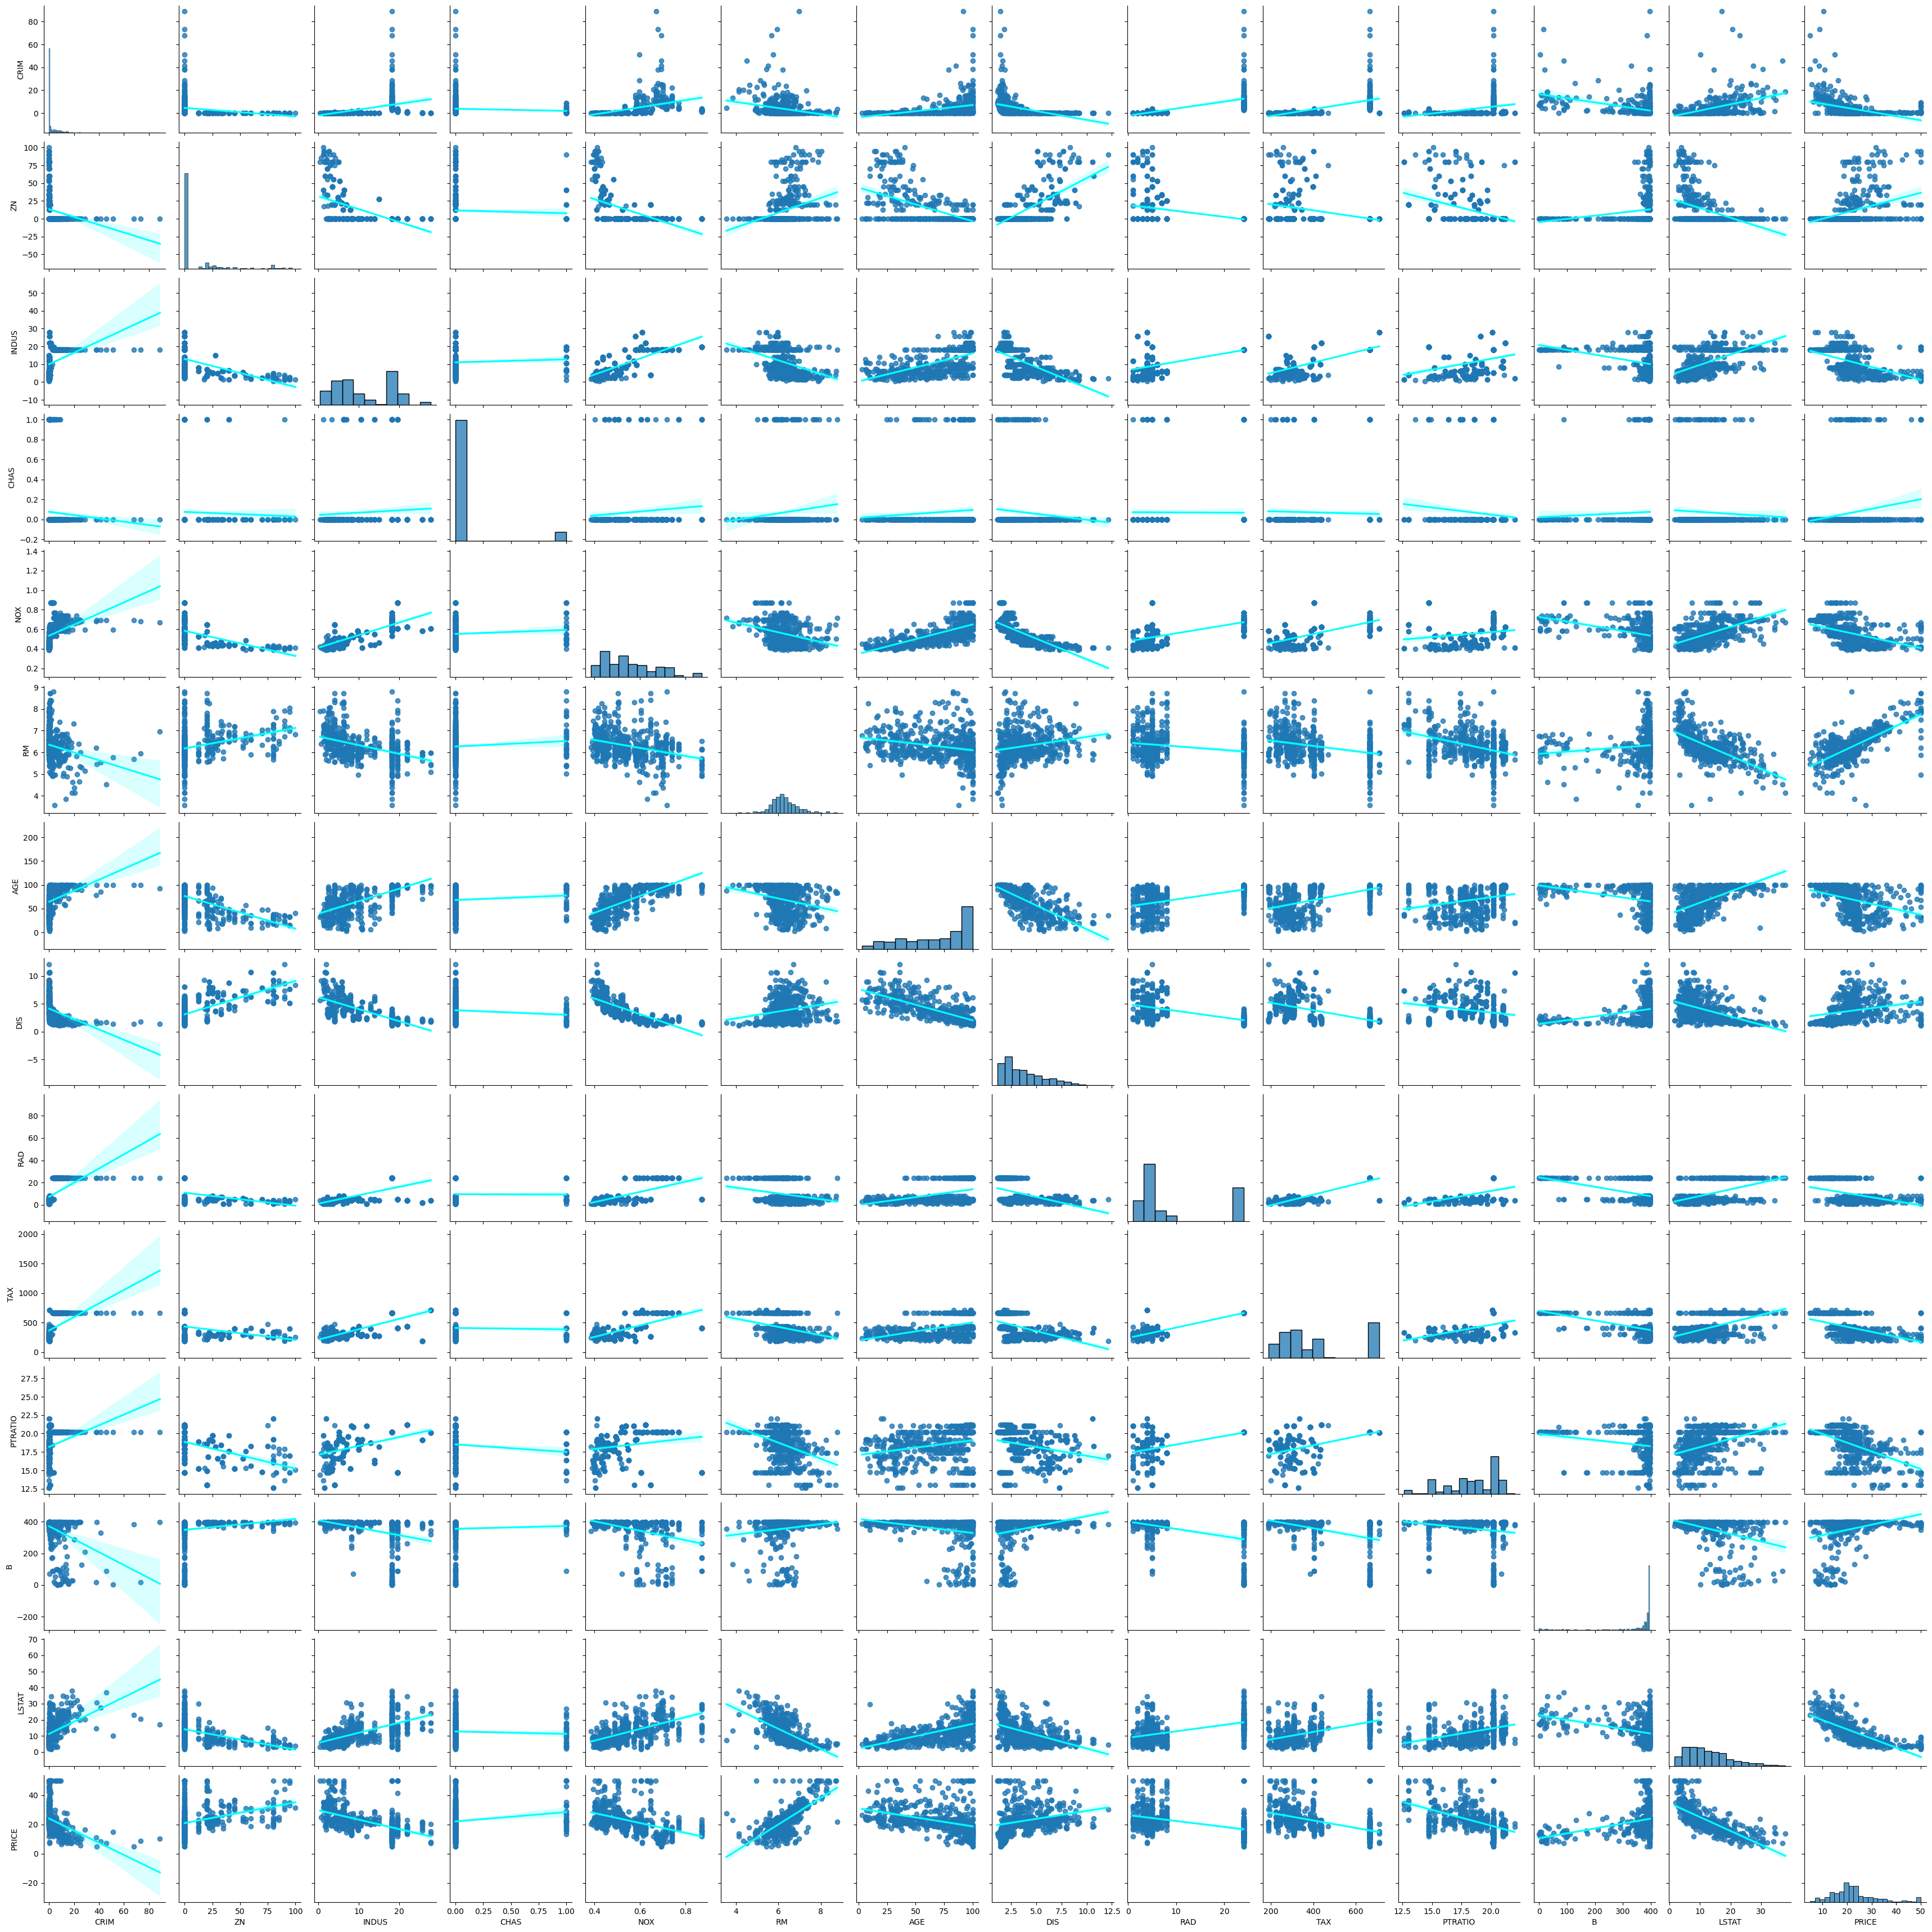

In [17]:
# To include a regression line
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

In [18]:
scatter_2 = px.scatter(df, 
                       x='PRICE', 
                       y='CRIM', 
                       color='RM', 
                       color_continuous_scale='Viridis',
                       title='How Price and Crime are related')
scatter_2.show()

In [19]:
scatter_3= px.scatter(df, 
                      x='PRICE', 
                      y='RM', 
                      color='CRIM', 
                      color_continuous_scale='Viridis',
                      title='How Room and Price and crime are related')
scatter_3.show()

# Machine Learning with pycaret

In [24]:
from pycaret.regression import setup, models

# Setup the environment with your dataset
exp = setup(df, target='PRICE', verbose=True)

# List all available regression models
available_models = models()

# Display the available models
print(available_models)

                                       Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada          

In [25]:
from pycaret.regression import compare_models

# Compare all models and get the best performing one
best_model = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [29]:
from pycaret.regression import finalize_model

# Finalize the best model
final_gbr_model = finalize_model('gbr')

In [ ]:
from pycaret.regression import evaluate_model

# Evaluate the finalized model
evaluate_model(final_gbr_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
from pycaret.regression import get_config

# Access the X_test (test features) and y_test (test labels) from the setup
X_test = get_config('X_test')
y_test = get_config('y_test')

In [32]:
from pycaret.regression import predict_model

# Assuming 'new_data' is your unseen dataset
predictions = predict_model(final_gbr_model, data=X_test)

# Check the predictions
print(predictions.head())

        CRIM    ZN  INDUS  CHAS    NOX     RM         AGE     DIS  RAD    TAX  \
326  0.30347   0.0   7.38   0.0  0.493  6.312   28.900000  5.4159  5.0  287.0   
6    0.08829  12.5   7.87   0.0  0.524  6.012   66.599998  5.5605  5.0  311.0   
348  0.01501  80.0   2.01   0.0  0.435  6.635   29.700001  8.3440  4.0  280.0   
145  2.37934   0.0  19.58   0.0  0.871  6.130  100.000000  1.4191  5.0  403.0   
252  0.08221  22.0   5.86   0.0  0.431  6.957    6.800000  8.9067  7.0  330.0   

     PTRATIO           B      LSTAT  prediction_label  
326     19.6  396.899994   6.150000         23.968538  
6       15.2  395.600006  12.430000         21.480310  
348     17.0  390.940002   5.990000         24.919502  
145     14.7  172.910004  27.799999         14.468294  
252     19.1  386.089996   3.530000         31.986502  


In [36]:
from pycaret.regression import save_model

# Save the final model
save_model(final_gbr_model, 'final_gbr_model')

# Optionally, save the predictions
predictions.to_csv('predictions.csv', index=False)

# Now, this model can be loaded anytime using load_model() in the future.

Transformation Pipeline and Model Successfully Saved


In [37]:
from pycaret.regression import tune_model

# Tune the GBR model (this will automatically search for better hyperparameters)
tuned_gbr_model = tune_model(final_gbr_model)

# Finalize the tuned model
final_tuned_gbr_model = finalize_model(tuned_gbr_model)

# Save the tuned model
save_model(final_tuned_gbr_model, 'tuned_gbr_model')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                              'TAX', 'PTRATIO', 'B', 'LSTAT'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer'...
                                            criterion='friedman_mse', init=None,
                

In [38]:
# Tuning will optimize parameters like the number of trees, learning rate, and tree depth to potentially improve the model’s performance.

In [ ]:
# If you're planning to deploy this model in a production environment (e.g., via a web service or API), you can save it and load it for inference. PyCaret models are compatible with frameworks like Flask or FastAPI for web deployments.

# to load the saved model later:

from pycaret.regression import load_model

# Load the model (for future inference or deployment)
loaded_model = load_model('final_gbr_model')

# Make predictions with the loaded model. predictions = predict_model(loaded_model, data=new_data)
predictions = predict_model(loaded_model, data=X_test)

Transformation Pipeline and Model Successfully Loaded


In [41]:
predictions

CRIM    ZN  INDUS  CHAS    NOX     RM         AGE     DIS   RAD  \
326  0.30347   0.0   7.38   0.0  0.493  6.312   28.900000  5.4159   5.0   
6    0.08829  12.5   7.87   0.0  0.524  6.012   66.599998  5.5605   5.0   
348  0.01501  80.0   2.01   0.0  0.435  6.635   29.700001  8.3440   4.0   
145  2.37934   0.0  19.58   0.0  0.871  6.130  100.000000  1.4191   5.0   
252  0.08221  22.0   5.86   0.0  0.431  6.957    6.800000  8.9067   7.0   
..       ...   ...    ...   ...    ...    ...         ...     ...   ...   
450  6.71772   0.0  18.10   0.0  0.713  6.749   92.599998  2.3236  24.0   
247  0.19657  22.0   5.86   0.0  0.431  6.226   79.199997  8.0555   7.0   
298  0.06466  70.0   2.24   0.0  0.400  6.345   20.100000  7.8278   5.0   
147  2.36862   0.0  19.58   0.0  0.871  4.926   95.699997  1.4608   5.0   
73   0.19539   0.0  10.81   0.0  0.413  6.245    6.200000  5.2873   4.0   

       TAX    PTRATIO           B      LSTAT  prediction_label  
326  287.0  19.600000  396.899994   6.150000         23.968538  
6    311.0  15.200000  395.600006  12.430000         21.480310  
348  280.0  17.000000  390.940002   5.990000         24.919502  
145  403.0  14.700000  172.910004  27.799999         14.468294  
252  330.0  19.100000  386.089996   3.530000         31.986502  
..     ...        ...         ...        ...               ...  
450  666.0  20.200001    0.320000  17.440001         13.136703  
247  330.0  19.100000  376.140015  10.150000         20.399037  
298  358.0  14.800000  368.239990   4.970000         23.914671  
147  403.0  14.700000  391.709991  29.530001         14.557155  
73   305.0  19.200001  377.170013   7.540000         24.004287  

[152 rows x 14 columns]

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Get the predicted values (from the 'Label' column in the predictions DataFrame)
y_pred = predictions.prediction_label

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute R²
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 1.2413339295116748
R²: 0.982026023964858


In [43]:
# Assuming y_test and y_pred are already defined
comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': y_pred
})

# Create a Plotly scatter plot to compare true vs predicted values
fig = px.scatter(comparison_df, x='True Values', y='Predicted Values', 
                 title='True vs Predicted Values', 
                 labels={'True Values': 'Actual Price', 'Predicted Values': 'Predicted Price'},
                 template='plotly_dark')

# Add a line y=x for visual reference
fig.add_scatter(x=comparison_df['True Values'], y=comparison_df['True Values'], mode='lines', name='y=x', line=dict(dash='dash', color='red'))

# Show the plot
fig.show()

# Compute and print the metrics (optional)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 1.2413339295116748
R²: 0.982026023964858


In [45]:
df.PRICE.min(), df.PRICE.max()

(5.0, 50.0)

In [49]:
# Calculate the mean of the true values (house prices)
mean_price = y_test.mean()

# Compute the relative RMSE as a percentage of the mean
relative_rmse = (rmse / mean_price) * 100

print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"This indicates that the model's average prediction error is {relative_rmse:.2f}% of the actual house price.")

Relative RMSE: 5.45%
This indicates that the model's average prediction error is 5.45% of the actual house price.
